In [2]:
import pandas as pd
df = pd.read_csv("heart_disease_dataset.csv")

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [4]:
new_column_list = []
for name in df.columns:
    temp_name = name.lower().replace(" ", "_")
    new_column_list.append(temp_name)
df.columns = new_column_list
df.columns


Index(['age', 'gender', 'cholesterol', 'blood_pressure', 'heart_rate',
       'smoking', 'alcohol_intake', 'exercise_hours', 'family_history',
       'diabetes', 'obesity', 'stress_level', 'blood_sugar',
       'exercise_induced_angina', 'chest_pain_type', 'heart_disease'],
      dtype='object')

In [5]:
import numpy as np
np.nan
df["alcohol_intake"].replace(np.nan, "NA", inplace=True)
df["alcohol_intake"].value_counts() 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14220\2064882645.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["alcohol_intake"].replace(np.nan, "NA", inplace=True)


alcohol_intake
Heavy       346
NA          340
Moderate    314
Name: count, dtype: int64

In [6]:
df["smoking"].value_counts()

smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

In [7]:
df["smoking"] = df.smoking.map({"Current": 2,"Former": 1 , "Never": 0})

In [8]:
df["gender"] = df.gender.map({"Female": 0, "Male": 1})

In [9]:
cheat_pain_map = {
    'Asymptomatic': 0,
    'Non-anginal Pain': 1,
    'Atypical Angina' : 2,
    'Typical Angina' : 3 }
df["chest_pain_type"] = df.chest_pain_type.map(cheat_pain_map)

alcohol_map = {
    'NA' : 0,
    'Moderate': 1, 
    'Heavy' : 2, 
}
df["alcohol_intake"] = df.alcohol_intake.map(alcohol_map)

yes_no_map = {
    'No' : 0,
    'Yes' : 1
}
df["family_history"] = df.family_history.map(yes_no_map)
df['obesity'] = df.obesity.map(yes_no_map)
df['diabetes'] = df.diabetes.map(yes_no_map)
df["exercise_induced_angina"] = df.exercise_induced_angina.map(yes_no_map)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1000 non-null   int64
 1   gender                   1000 non-null   int64
 2   cholesterol              1000 non-null   int64
 3   blood_pressure           1000 non-null   int64
 4   heart_rate               1000 non-null   int64
 5   smoking                  1000 non-null   int64
 6   alcohol_intake           1000 non-null   int64
 7   exercise_hours           1000 non-null   int64
 8   family_history           1000 non-null   int64
 9   diabetes                 1000 non-null   int64
 10  obesity                  1000 non-null   int64
 11  stress_level             1000 non-null   int64
 12  blood_sugar              1000 non-null   int64
 13  exercise_induced_angina  1000 non-null   int64
 14  chest_pain_type          1000 non-null   int64
 15  heart

In [140]:
df.head()

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,0,228,119,66,2,2,1,0,0,1,8,119,1,2,1
1,48,1,204,165,62,2,0,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,0,2,3,1,0,1,5,196,1,2,1
3,69,0,192,90,72,2,0,4,0,1,0,7,107,1,1,0
4,62,0,172,163,93,0,0,6,0,1,0,2,183,1,0,0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9632\3349710100.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.correlartion = df.corr()


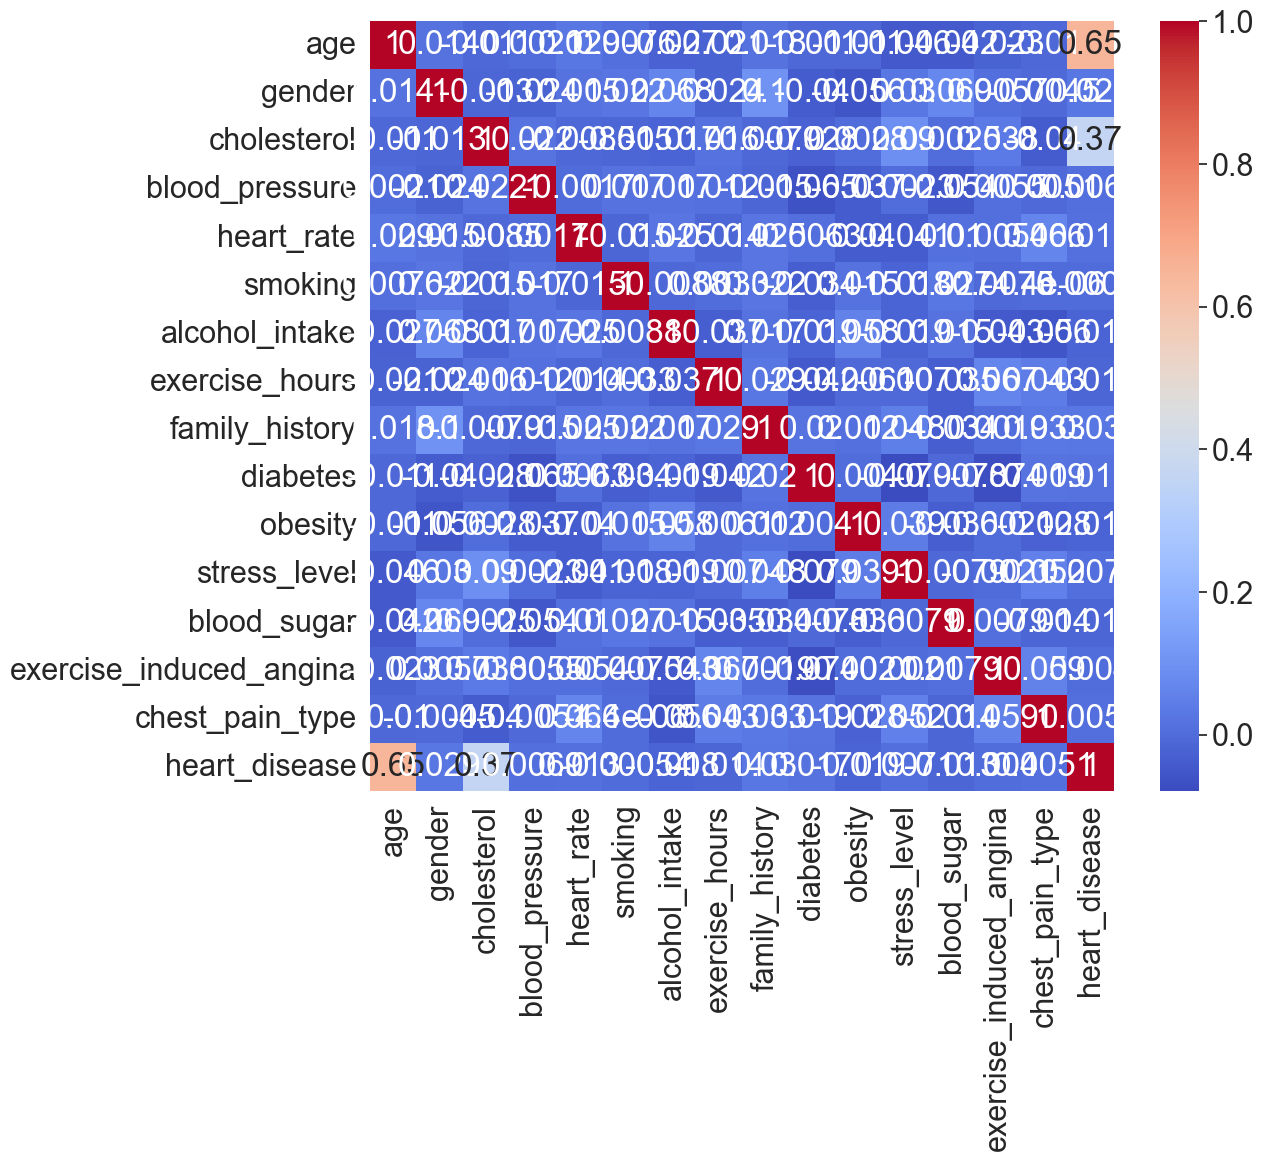

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

df.correlartion = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df.correlartion, annot=True, cmap="coolwarm")
plt.show()


Inferences from the above heat map:
1. there is no notable corr between all the columns in the dataset.
2. the only significant corr is with **age and heart_disease** and **cholesterol and heart_disease**.


Answer for Q1.
since Age and heart disease are more correlated we can further analyse more with both the columns to find insights.

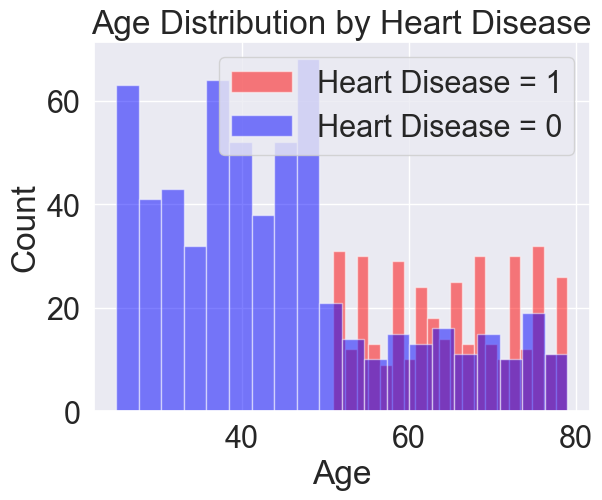

In [128]:
plt.hist(df[df["heart_disease"] == 1]["age"], bins=20, color="red", alpha=0.5, label="Heart Disease = 1")
plt.hist(df[df["heart_disease"] == 0]["age"], bins=20, color="blue", alpha=0.5, label="Heart Disease = 0")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age Distribution by Heart Disease")
plt.show()

In [4]:
df["alcohol_intake"]

0         Heavy
1           NaN
2         Heavy
3           NaN
4           NaN
         ...   
995       Heavy
996         NaN
997    Moderate
998         NaN
999         NaN
Name: alcohol_intake, Length: 1000, dtype: object

In [ ]:
#df.fillna({'alcohol_intake': pd.NA}, inplace=True)
%pip install numpy
import numpy as np
np.nan
df["alcohol_intake"].replace(np.nan, "NA", inplace=True)
df["alcohol_intake"].value_counts() 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


alcohol_intake
Heavy       346
NA          340
Moderate    314
Name: count, dtype: int64

In [6]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1000 non-null   int64 
 1   gender                   1000 non-null   object
 2   cholesterol              1000 non-null   int64 
 3   blood_pressure           1000 non-null   int64 
 4   heart_rate               1000 non-null   int64 
 5   smoking                  1000 non-null   object
 6   alcohol_intake           1000 non-null   object
 7   exercise_hours           1000 non-null   int64 
 8   family_history           1000 non-null   object
 9   diabetes                 1000 non-null   object
 10  obesity                  1000 non-null   object
 11  stress_level             1000 non-null   int64 
 12  blood_sugar              1000 non-null   int64 
 13  exercise_induced_angina  1000 non-null   object
 14  chest_pain_type          1000 non-null   

,age,gender,cholesterol,blood_pressure,heart_rate,smoking,alcohol_intake,exercise_hours,family_history,diabetes,obesity,stress_level,blood_sugar,exercise_induced_angina,chest_pain_type,heart_disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NA,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NA,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NA,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NA,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NA,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


In [7]:
df[["age", "blood_sugar"]].sort_values(by="age", ascending=False).head(10)


,age,blood_sugar
997,79,189
425,79,89
426,79,186
432,79,71
74,79,158
510,79,148
886,79,83
112,79,160
847,79,71
389,79,141


In [8]:
df_with_disesae = df[df["heart_disease"] == 1]
df_without_disease = df[df["heart_disease"] == 0]

df_with_disesae.describe(), df_without_disease.describe()

(              age  cholesterol  blood_pressure  heart_rate  exercise_hours  \
 count  392.000000   392.000000      392.000000  392.000000      392.000000   
 mean    64.956633   276.255102      135.507653   79.392857        4.477041   
 std      8.464498    43.432238       26.171380   11.695136        2.890054   
 min     51.000000   201.000000       90.000000   60.000000        0.000000   
 25%     58.000000   240.000000      113.000000   70.000000        2.000000   
 50%     65.000000   278.000000      135.500000   79.000000        4.000000   
 75%     72.000000   317.000000      158.250000   89.000000        7.000000   
 max     79.000000   349.000000      179.000000   99.000000        9.000000   
 
        stress_level  blood_sugar  heart_disease  
 count    392.000000   392.000000          392.0  
 mean       5.670918   134.346939            1.0  
 std        2.850292    36.098006            0.0  
 min        1.000000    70.000000            1.0  
 25%        3.000000   104.00000

In [9]:
df_without_disease.min(), df_without_disease.max()

(age                                  25
 gender                           Female
 cholesterol                         150
 blood_pressure                       90
 heart_rate                           60
 smoking                         Current
 alcohol_intake                    Heavy
 exercise_hours                        0
 family_history                       No
 diabetes                             No
 obesity                              No
 stress_level                          1
 blood_sugar                          70
 exercise_induced_angina              No
 chest_pain_type            Asymptomatic
 heart_disease                         0
 dtype: object,
 age                                    79
 gender                               Male
 cholesterol                           349
 blood_pressure                        179
 heart_rate                             99
 smoking                             Never
 alcohol_intake                         NA
 exercise_hours            

In [10]:
df_with_disesae.min(), df_with_disesae.max()

(age                                  51
 gender                           Female
 cholesterol                         201
 blood_pressure                       90
 heart_rate                           60
 smoking                         Current
 alcohol_intake                    Heavy
 exercise_hours                        0
 family_history                       No
 diabetes                             No
 obesity                              No
 stress_level                          1
 blood_sugar                          70
 exercise_induced_angina              No
 chest_pain_type            Asymptomatic
 heart_disease                         1
 dtype: object,
 age                                    79
 gender                               Male
 cholesterol                           349
 blood_pressure                        179
 heart_rate                             99
 smoking                             Never
 alcohol_intake                         NA
 exercise_hours            

In [11]:
df_with_disesae["blood_sugar"].min(), df_with_disesae["blood_sugar"].max()


(np.int64(70), np.int64(199))

In [12]:
df_without_disease["blood_sugar"].min(), df_without_disease["blood_sugar"].max()

(np.int64(70), np.int64(199))

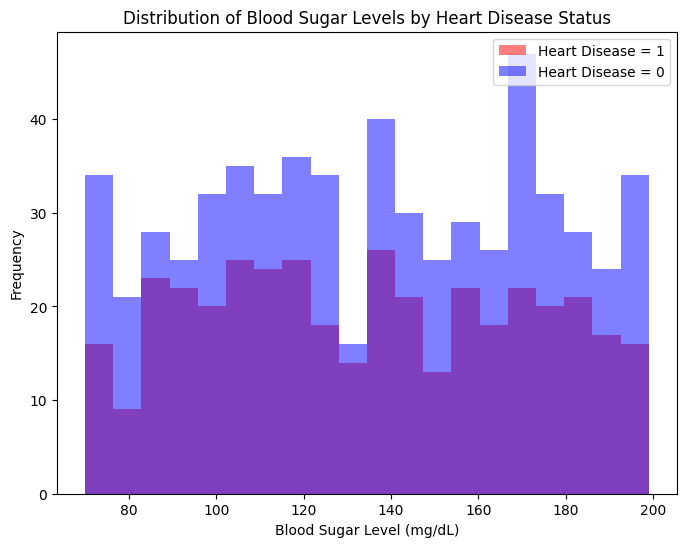

In [13]:


import matplotlib.pyplot as plt

# Plotting the histograms for blood sugar levels
plt.figure(figsize=(8, 6))

# Blood sugar levels for heart disease = 1
plt.hist(df[df['heart_disease'] == 1]['blood_sugar'], bins=20, color="red", alpha=0.5, label='Heart Disease = 1')

# Blood sugar levels for heart disease = 0
plt.hist(df[df['heart_disease'] == 0]['blood_sugar'], bins=20, color="blue", alpha=0.5, label='Heart Disease = 0')

plt.title('Distribution of Blood Sugar Levels by Heart Disease Status')
plt.xlabel('Blood Sugar Level (mg/dL)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


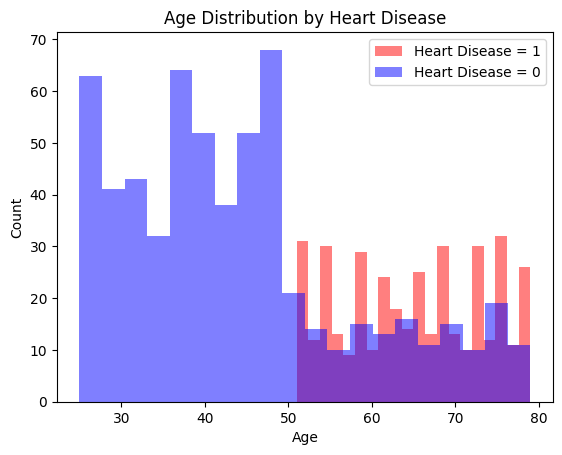

In [49]:
plt.hist(df[df["heart_disease"] == 1]["age"], bins=20, color="red", alpha=0.5, label="Heart Disease = 1")
plt.hist(df[df["heart_disease"] == 0]["age"], bins=20, color="blue", alpha=0.5, label="Heart Disease = 0")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.title("Age Distribution by Heart Disease")
plt.show()

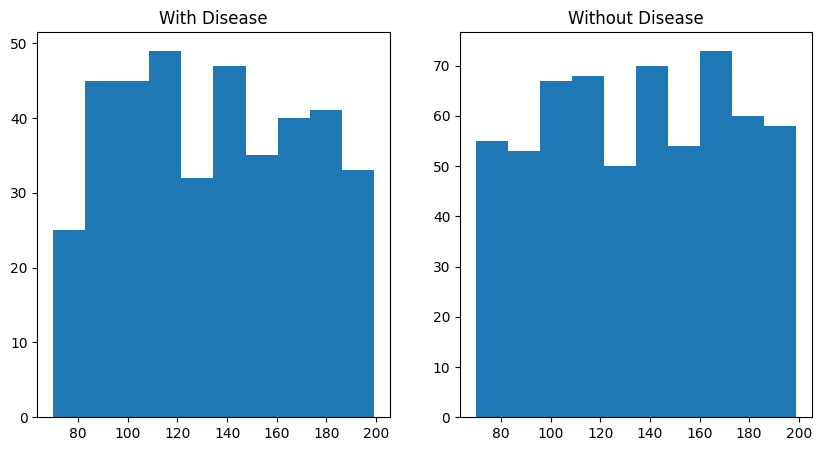

In [42]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].hist(df_with_disesae["blood_sugar"])
axis[0].set_title("With Disease")
axis[1].hist(df_without_disease["blood_sugar"])
axis[1].set_title("Without Disease")
plt.show()


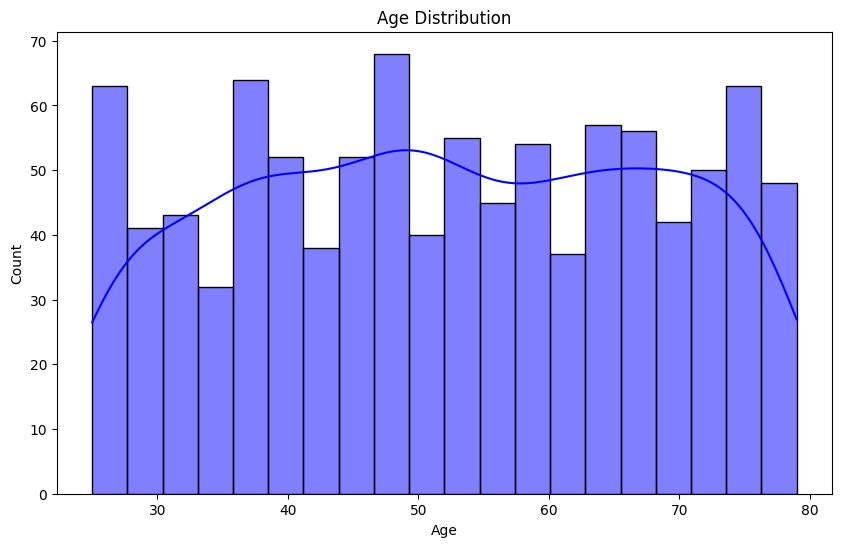

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=20, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
df["Age"].value_counts().sort_values(ascending=True).head(10)

Age
57    12
30    12
29    12
60    13
47    14
65    14
31    14
39    14
33    14
45    15
Name: count, dtype: int64

In [ ]:
df["Gender"] = df["Gender"].replace({"Female" : 1, 'Male' : 2})
df.head(10)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12932\3270539796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Female" : 1, 'Male' : 2})


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,1,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,2,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,2,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,1,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,1,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
5,77,2,309,110,73,Never,NaN,0,No,Yes,Yes,4,122,Yes,Asymptomatic,1
6,64,1,211,105,86,Former,Heavy,8,Yes,Yes,Yes,2,120,No,Typical Angina,1
7,60,1,208,148,83,Never,Moderate,4,No,Yes,Yes,2,113,Yes,Asymptomatic,1
8,37,1,317,137,66,Current,Heavy,3,No,Yes,Yes,5,114,No,Non-anginal Pain,0
9,63,2,204,141,68,Former,Heavy,8,No,Yes,No,3,107,No,Asymptomatic,1


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df)

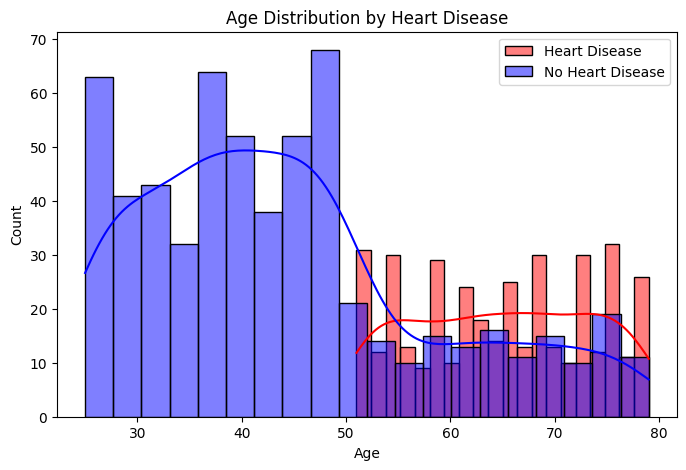

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["heart_disease"] == 1]["age"], bins=20, color="red", kde=True, label="Heart Disease")
sns.histplot(df[df["heart_disease"] == 0]["age"], bins=20, color="blue", kde=True, label="No Heart Disease", alpha=0.5)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

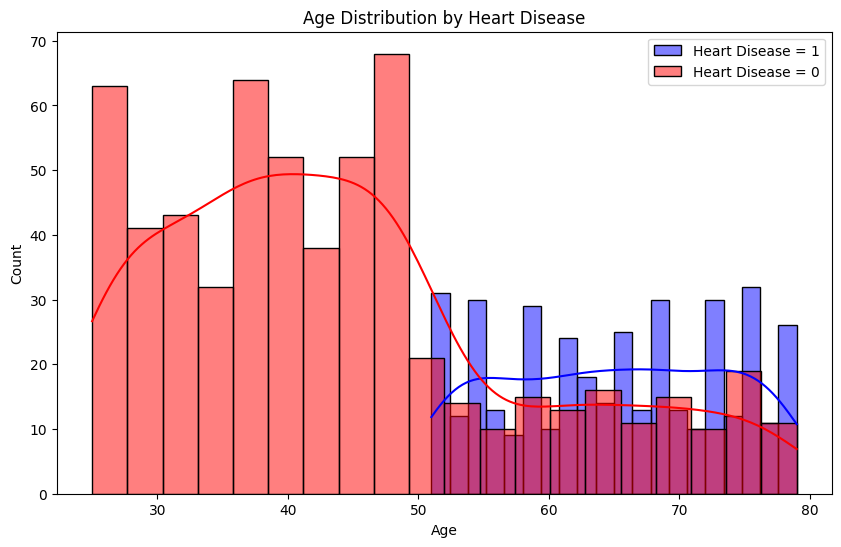

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df["age"][df["heart_disease"] == 1], bins=20, color="blue", alpha=0.5, kde = True,   label="Heart Disease = 1")
sns.histplot(df["age"][df["heart_disease"] == 0], bins=20, color="red", alpha=0.5, kde = True, label="Heart Disease = 0")
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()
fig.savefig('Age Distribution by Heart Disease.png')

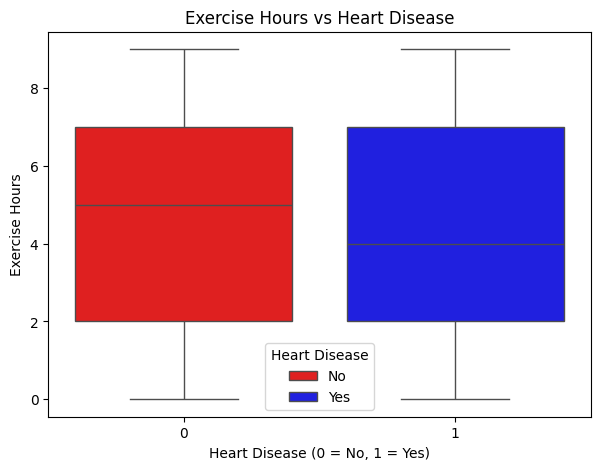

In [22]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="heart_disease", y="exercise_hours", data=df, hue="heart_disease", palette={0: "red", 1: "blue"})
plt.title("Exercise Hours vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Exercise Hours")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

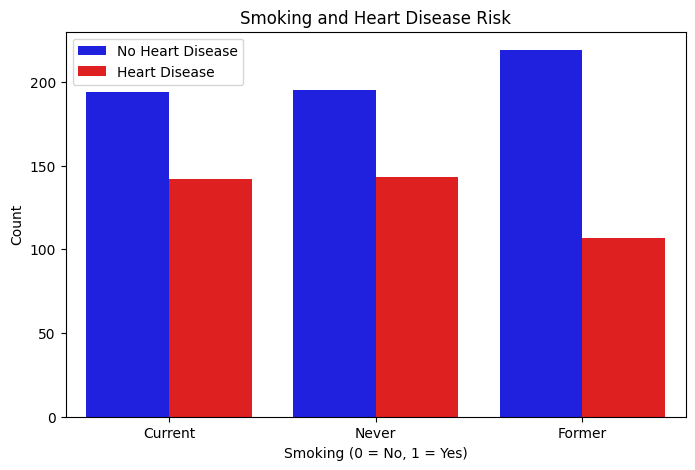

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x="smoking", hue="heart_disease", data=df, palette=["blue", "red"])
plt.title("Smoking and Heart Disease Risk")
plt.xlabel("Smoking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()


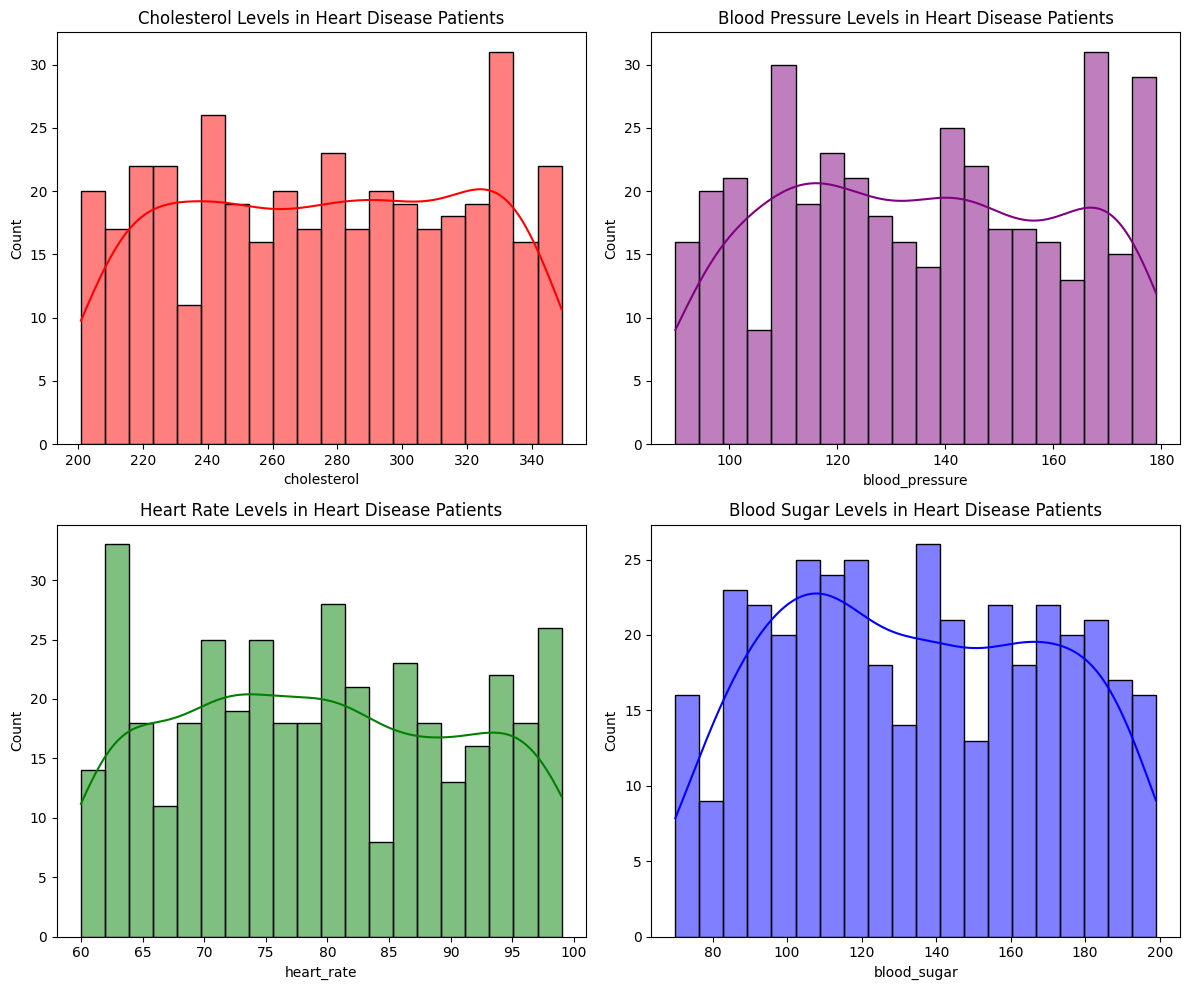

In [26]:
heart_disease_df = df[df["heart_disease"] == 1]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(heart_disease_df["cholesterol"], bins=20, kde=True, color="red", ax=axes[0, 0])
axes[0, 0].set_title("Cholesterol Levels in Heart Disease Patients")

sns.histplot(heart_disease_df["blood_pressure"], bins=20, kde=True, color="purple", ax=axes[0, 1])
axes[0, 1].set_title("Blood Pressure Levels in Heart Disease Patients")

sns.histplot(heart_disease_df["heart_rate"], bins=20, kde=True, color="green", ax=axes[1, 0])
axes[1, 0].set_title("Heart Rate Levels in Heart Disease Patients")

sns.histplot(heart_disease_df["blood_sugar"], bins=20, kde=True, color="blue", ax=axes[1, 1])
axes[1, 1].set_title("Blood Sugar Levels in Heart Disease Patients")

plt.tight_layout()
plt.show()


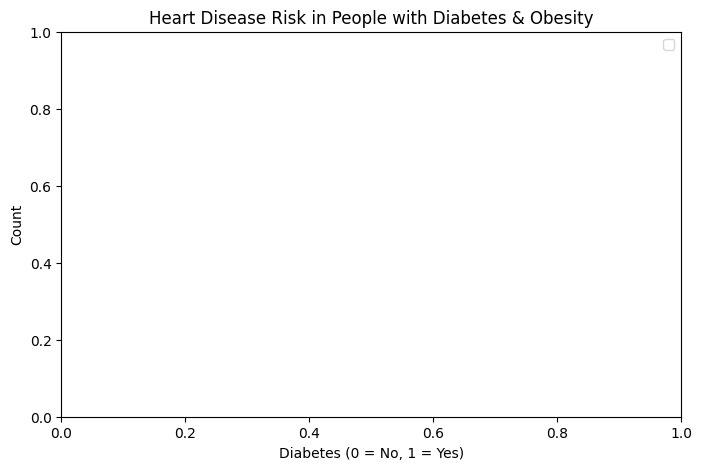

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x="diabetes", hue="heart_disease", data=df[df["obesity"] == 1], palette=["blue", "red"])
plt.title("Heart Disease Risk in People with Diabetes & Obesity")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.show()

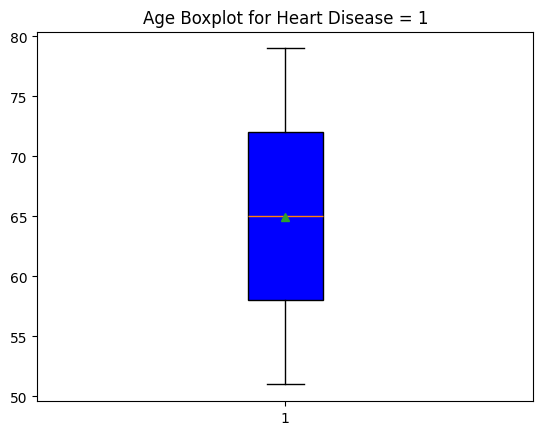

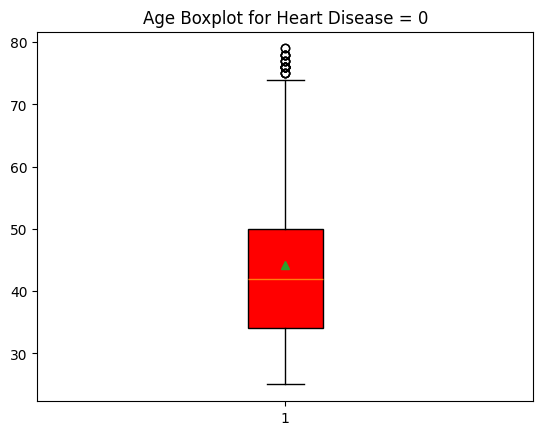

In [ ]:
plt.boxplot(df["Age"][df["Heart Disease"] == 1], patch_artist=True, boxprops=dict(facecolor="blue"), showmeans=True)
plt.title("Age Boxplot for Heart Disease = 1")
plt.show()
plt.boxplot(df["Age"][df["Heart Disease"] == 0], patch_artist=True, boxprops=dict(facecolor="red"), showmeans=True)
plt.title("Age Boxplot for Heart Disease = 0")
plt.show()

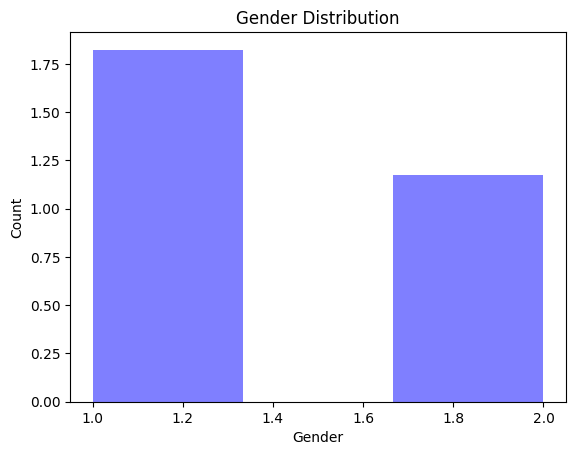

In [ ]:
plt.hist(df["Gender"][df['Heart Disease']], bins=3, color="blue", alpha=0.5, density=True, label="Heart Disease = 1")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

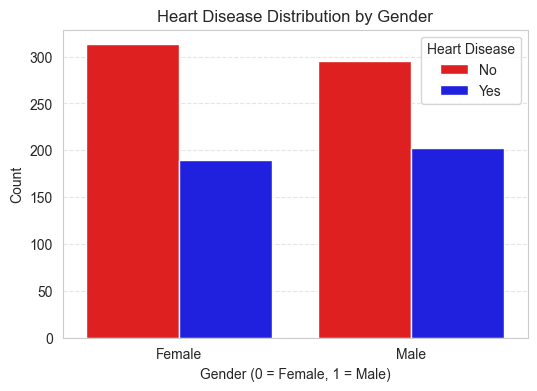

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_copy, x="Gender", hue="Heart Disease", palette=["red", "blue"])

# Titles and labels
plt.title("Heart Disease Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show plot
plt.show()


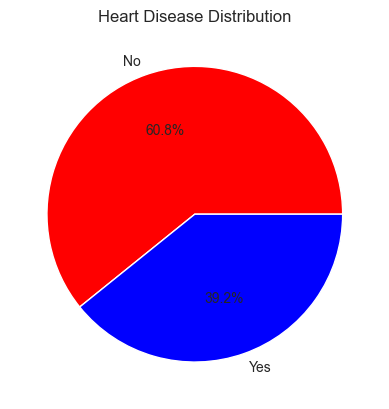

In [ ]:
plt.pie(df["Heart Disease"].value_counts(), labels=["No", "Yes"], autopct="%1.1f%%", colors=["red", "blue"])
plt.title("Heart Disease Distribution")
plt.show()

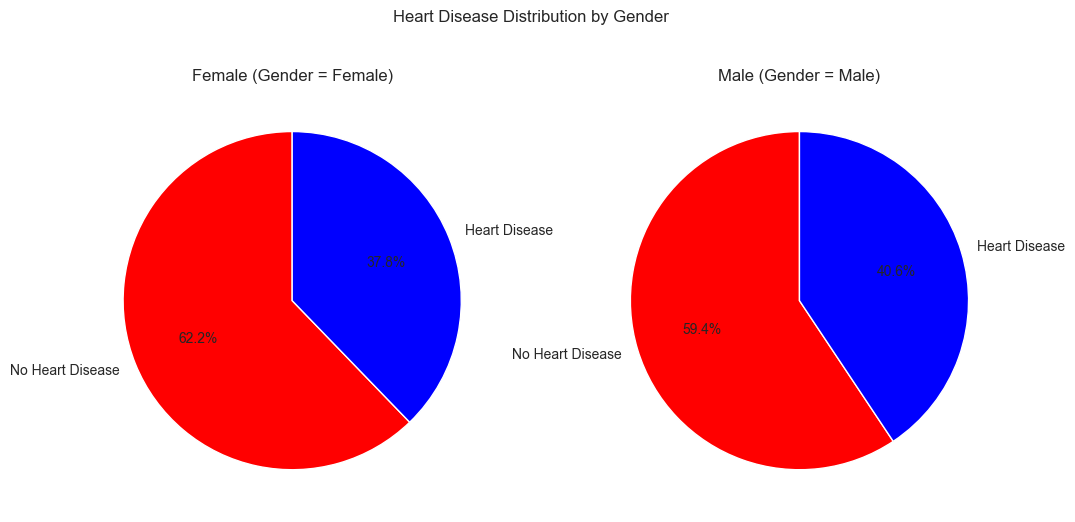

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a grouped DataFrame
gender_hd_counts = df_copy.groupby(["Gender", "Heart Disease"]).size().unstack()

# Define labels
labels = ["No Heart Disease", "Heart Disease"]

# Create pie charts for both genders
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Female Pie Chart (Gender = Female)
axes[0].pie(gender_hd_counts.loc['Female'], labels=labels, autopct="%1.1f%%", colors=["red", "blue"], startangle=90)
axes[0].set_title("Female (Gender = Female)")

# Male Pie Chart (Gender = Male)
axes[1].pie(gender_hd_counts.loc['Male'], labels=labels, autopct="%1.1f%%", colors=["red", "blue"], startangle=90)
axes[1].set_title("Male (Gender = Male)")

# Display the plot
plt.suptitle("Heart Disease Distribution by Gender")
plt.show()


In [6]:
print("Skewness:", df["age"].skew())  # Should be close to 0 for normality
print("Kurtosis:", df["age"].kurt())  # Should be close to 3 for normality


Skewness: -0.028256736788575463
Kurtosis: -1.1604102965908354


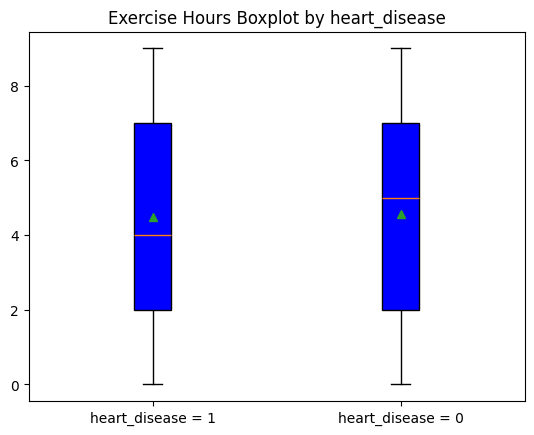

In [12]:
plt.boxplot([df["exercise_hours"][df["heart_disease"] == 1], df["exercise_hours"][df["heart_disease"] == 0]], patch_artist=True, boxprops=dict(facecolor="blue"), showmeans=True)
plt.title("Exercise Hours Boxplot by heart_disease")
plt.xticks([1, 2], ["heart_disease = 1", "heart_disease = 0"])
plt.show()